In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#carregando base de dados 
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv', sep= ';')
df

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,...,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,...,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,...,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,...,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,...,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2025,1,317,10.0,6,333.0,68.0,401,342,6055,...,927.0,116.0,6159.0,552.0,40,3.0,2.0,0.0,81562.0,3
409,2025,2,245,6.0,6,257.0,79.0,336,324,5973,...,972.0,139.0,6149.0,520.0,50,2.0,0.0,2.0,80306.0,3
410,2025,3,271,10.0,7,288.0,59.0,347,347,6249,...,1102.0,136.0,6406.0,622.0,40,3.0,1.0,0.0,84129.0,3
411,2025,4,205,6.0,6,217.0,80.0,297,296,4987,...,933.0,105.0,5498.0,498.0,31,1.0,0.0,0.0,75761.0,2


In [3]:
#selecionando colunas a serem utilizadas
df_carros = df[['ano', 'roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']]
df_carros

,ano,roubo_veiculo,furto_veiculos,recuperacao_veiculos
0,1991,1174,2009,872
1,1991,1097,1850,751
2,1991,1265,2084,789
3,1991,1415,2085,787
4,1991,1449,2185,845
...,...,...,...,...
408,2025,2661,1597,1717
409,2025,2430,1485,2061
410,2025,1482,1363,1262
411,2025,1579,1274,1198


In [4]:
#limitando para década
decada = df_carros[df_carros['ano'] >= 2015]
decada

,ano,roubo_veiculo,furto_veiculos,recuperacao_veiculos
288,2015,2874,1593,2328
289,2015,2494,1334,1969
290,2015,2861,1521,2310
291,2015,2690,1321,1968
292,2015,2451,1432,2031
...,...,...,...,...
408,2025,2661,1597,1717
409,2025,2430,1485,2061
410,2025,1482,1363,1262
411,2025,1579,1274,1198


In [5]:
recup_decada = decada.groupby(['ano'])['recuperacao_veiculos'].sum().reset_index()
roubo_decada = decada.groupby(['ano'])['roubo_veiculo'].sum().reset_index()
furto_decada = decada.groupby(['ano'])['furto_veiculos'].sum().reset_index()



In [6]:
dados_decada = pd.concat([recup_decada, roubo_decada, furto_decada])
dados_decada = dados_decada.sort_values(by= 'ano')
dados_decada = dados_decada.groupby(['ano'])[['recuperacao_veiculos', 'roubo_veiculo', 'furto_veiculos']].sum().reset_index()
dados_decada

,ano,recuperacao_veiculos,roubo_veiculo,furto_veiculos
0,2015,23663.0,31035.0,16944.0
1,2016,28690.0,41696.0,16759.0
2,2017,37630.0,54366.0,15708.0
3,2018,36448.0,52097.0,15794.0
4,2019,26863.0,39749.0,15595.0
5,2020,15945.0,25425.0,12895.0
6,2021,13702.0,24332.0,14428.0
7,2022,13210.0,25198.0,16864.0
8,2023,14675.0,22248.0,16577.0
9,2024,19034.0,30930.0,17337.0


In [7]:
#
recuperacao_decada_ano = recup_decada.sort_values(by= 'ano')
recuperacao_decada_ano

,ano,recuperacao_veiculos
0,2015,23663
1,2016,28690
2,2017,37630
3,2018,36448
4,2019,26863
5,2020,15945
6,2021,13702
7,2022,13210
8,2023,14675
9,2024,19034


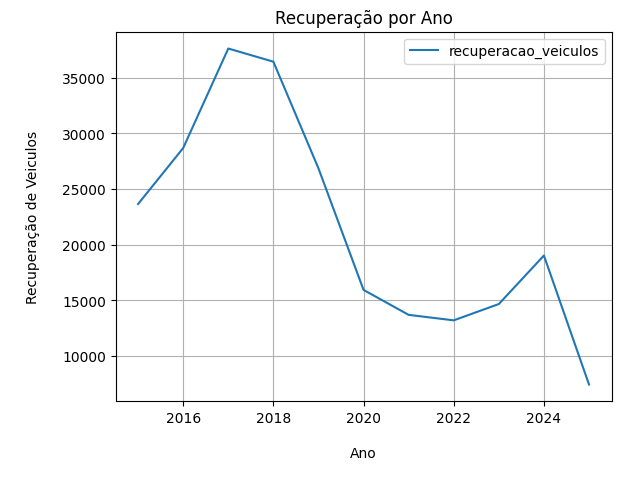

In [8]:
#Verificado crescimento até 2017, onde teve uma queda significativa até 2023, onde estamos novamento num processo de leve alta.
recuperacao_decada_ano.plot(x='ano', y='recuperacao_veiculos', kind='line')
plt.title('Recuperação por Ano')
plt.xlabel('\nAno\n')
plt.ylabel('\nRecuperação de Veiculos\n')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

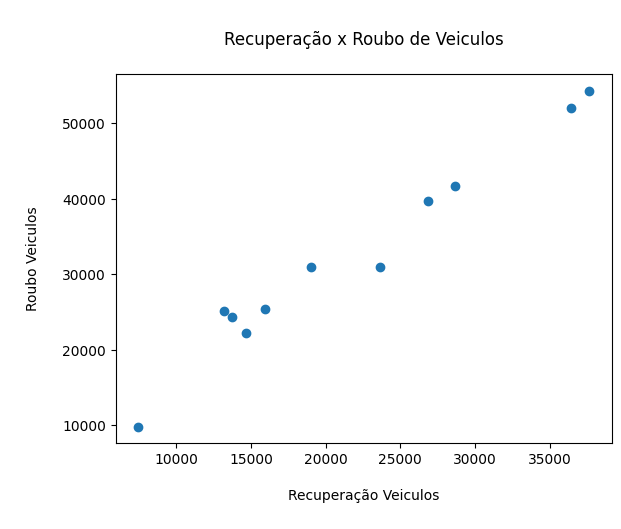

In [9]:
#Com o cruzamento de informações se percebe que a roubo esta fortemente correlacionado a quantidade de recuperação de veiculo. O que mostra que necessitamos inverter esta lógica,
# aumentando o numero de recuperções. ao mesmo tempo em que se ataque fortemente o problema de roubos de veiculos.
plt.scatter(dados_decada['recuperacao_veiculos'], dados_decada['roubo_veiculo'])
plt.xlabel('\nRecuperação Veiculos\n') 
plt.ylabel('\nRoubo Veiculos\n')
plt.title('\nRecuperação x Roubo de Veiculos\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

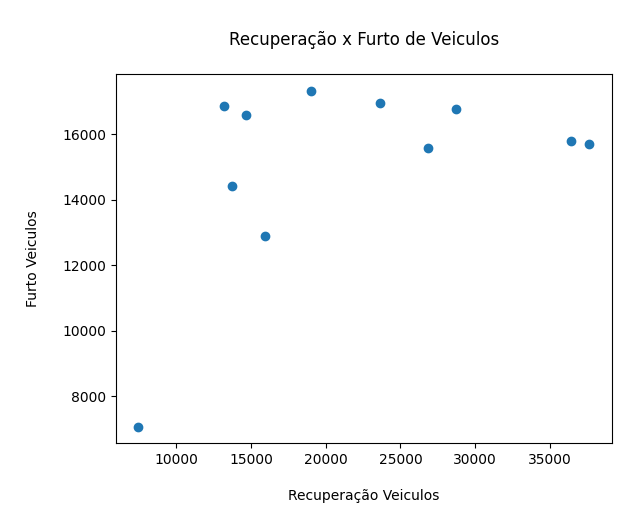

In [10]:
plt.scatter(dados_decada['recuperacao_veiculos'], dados_decada['furto_veiculos'])
plt.xlabel('\nRecuperação Veiculos\n') 
plt.ylabel('\nFurto Veiculos\n')
plt.title('\nRecuperação x Furto de Veiculos\n')
plt.show

In [11]:
recup = np.array(dados_decada['recuperacao_veiculos'])
recup



array([23663., 28690., 37630., 36448., 26863., 15945., 13702., 13210.,
       14675., 19034.,  7444.])

In [12]:
media = np.mean(recup)
media

np.float64(21573.090909090908)

In [13]:
mediana = np.median(recup)
mediana

np.float64(19034.0)

In [14]:
distancia = (media - mediana) / mediana
distancia_percentual = f"{(distancia * 100):.2f}%"
distancia_percentual


'13.34%'

In [15]:
df_municip = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep= ';', encoding= 'latin1')
df_municip


,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,3306008,Três Rios,2025,5,2025m05,Interior,5,0,0,5,...,15,0,60,1,0,0,0,0,493,2
12600,3306107,Valença,2025,5,2025m05,Interior,4,0,0,4,...,9,0,32,1,0,0,0,0,257,2
12601,3306156,Varre-Sai,2025,5,2025m05,Interior,0,0,0,0,...,0,0,8,0,0,0,0,0,23,2
12602,3306206,Vassouras,2025,5,2025m05,Interior,0,0,0,0,...,3,0,17,1,0,0,0,0,131,2


In [16]:
apreensao_municip = df_municip[['ano', 'regiao','fmun', 'aaapai' ]]
apreensao_municip


,ano,regiao,fmun,aaapai
0,2014,Interior,Angra dos Reis,6
1,2014,Interior,Aperibé,0
2,2014,Interior,Araruama,5
3,2014,Interior,Areal,0
4,2014,Interior,Armação dos Búzios,8
...,...,...,...,...
12599,2025,Interior,Três Rios,3
12600,2025,Interior,Valença,1
12601,2025,Interior,Varre-Sai,0
12602,2025,Interior,Vassouras,0


In [17]:
apreensao_baixada = apreensao_municip.loc[apreensao_municip['regiao'] == 'Baixada Fluminense']

apreensao_baixada_ano = apreensao_baixada.groupby(['fmun'])['aaapai'].sum().reset_index() 

apreensao_baixada_ano


,fmun,aaapai
0,Belford Roxo,1513
1,Duque de Caxias,2971
2,Guapimirim,187
3,ItaguaÃ­,10
4,Itaguaí,423
5,Japeri,257
6,MagÃ©,7
7,Magé,802
8,Mesquita,758
9,NilÃ³polis,7


In [18]:
array_apreensao = np.array(apreensao_baixada_ano['aaapai'])
array_apreensao



array([1513, 2971,  187,   10,  423,  257,    7,  802,  758,    7,  400,
         18, 2496,  190,  364,    0,  192,   26, 2039])

In [19]:
q1 = np.percentile(array_apreensao, 25)
q2 = np.percentile(array_apreensao, 50)
q3 = np.percentile(array_apreensao, 75)
print(f'O primeiro quartil é até {q1}, o segundo até {q2} e o terceiro até {q3}')

O primeiro quartil é até 22.0, o segundo até 257.0 e o terceiro até 780.0


In [20]:
# MUNICIPIOS COM MAIS APREENSOES DE MENORES
quarto_quartil = apreensao_baixada_ano[apreensao_baixada_ano['aaapai'] >= q3]
quarto_quartil = quarto_quartil.sort_values(by= 'aaapai', ascending= False)
quarto_quartil


,fmun,aaapai
1,Duque de Caxias,2971
12,Nova Iguaçu,2496
18,São João de Meriti,2039
0,Belford Roxo,1513
7,Magé,802


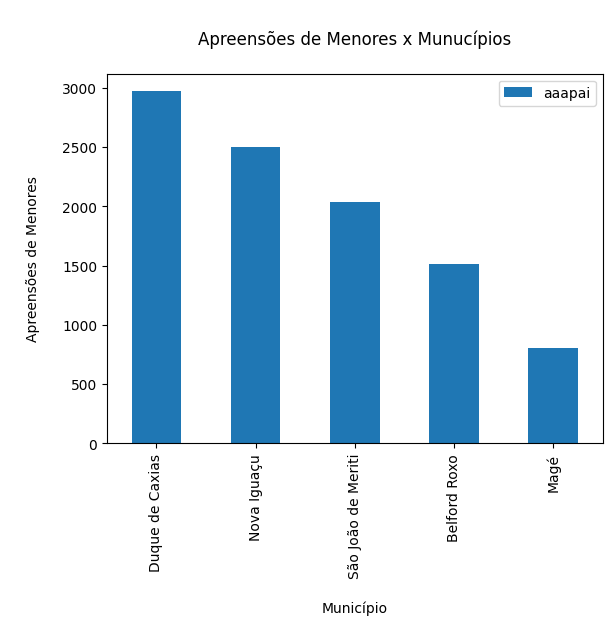

In [21]:
quarto_quartil.plot(kind='bar', x= 'fmun', y= 'aaapai')
plt.ylabel('\nApreensões de Menores\n') 
plt.xlabel('\nMunicípio\n')
plt.title('\nApreensões de Menores x Munucípios\n')
plt.show()

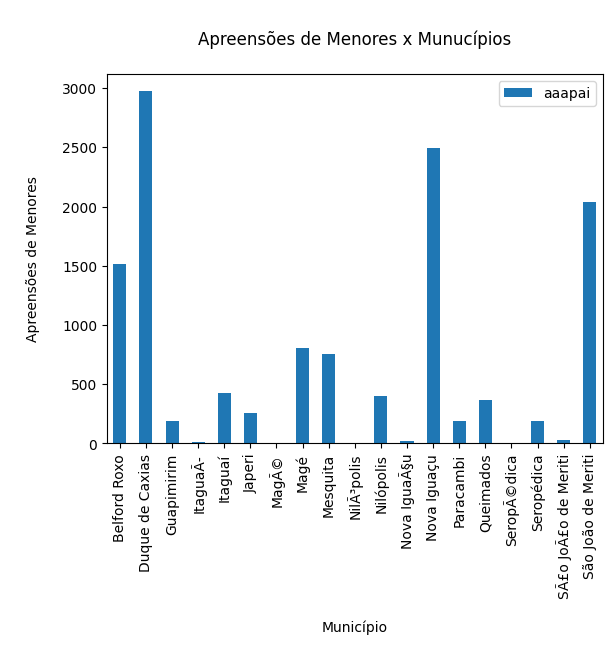

In [22]:
#CONSTATAÇÃO QUE EXISTE ALTA TAXA DE CONCENTRAÇÃO EM POUCOS MUNICIPIOS, COM UMA DIFERENÇA SIGNIFICATIVA ENTRE OS TRES PRIMEIROS, 
#SENDO O PRIMEIRO COLOCADO COM QUASE O DOBRO DE APREENSÕES QUE O QUARTO. 
#PERCEBEEMOS TAMBÉM QUE OS DOIS MINUCIPIOS COM MAIS APREENSOES TAMBÉM SÃO OS MAIS POPULOSOS. 
apreensao_baixada_ano.plot(kind='bar', x= 'fmun', y= 'aaapai')
plt.ylabel('\nApreensões de Menores\n') 
plt.xlabel('\nMunicípio\n')
plt.title('\nApreensões de Menores x Munucípios\n')
plt.show()

In [23]:
df_delegacia = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding= 'latin1')
df_delegacia


,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36213,159,5,2025,2025m05,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,3.0,0.0,24,1,0,0,0,0,150,2
36214,165,5,2025,2025m05,33,5,Mangaratiba,3302601,Interior,1,...,7.0,0.0,29,2,0,0,0,0,208,2
36215,166,5,2025,2025m05,33,5,Angra dos Reis,3300100,Interior,3,...,14.0,1.0,59,2,0,0,0,0,580,2
36216,167,5,2025,2025m05,43,5,Paraty,3303807,Interior,3,...,6.0,0.0,37,0,0,0,0,0,230,2


In [24]:
estelionato = df_delegacia[['ano', 'regiao','munic', 'estelionato', 'cisp' ]]
estelionato

,ano,regiao,munic,estelionato,cisp
0,2003,Capital,Rio de Janeiro,69,1
1,2003,Capital,Rio de Janeiro,1,4
2,2003,Capital,Rio de Janeiro,37,5
3,2003,Capital,Rio de Janeiro,8,6
4,2003,Capital,Rio de Janeiro,4,7
...,...,...,...,...,...
36213,2025,Interior,Cachoeiras de Macacu,28,159
36214,2025,Interior,Mangaratiba,24,165
36215,2025,Interior,Angra dos Reis,84,166
36216,2025,Interior,Paraty,32,167


In [25]:
estelionato_capital = estelionato.loc[estelionato['munic'] == 'Rio de Janeiro']
estelionato_capital_ano = estelionato_capital.groupby(['ano'])['estelionato'].sum().reset_index()
estelionato_capital_ano


,ano,estelionato
0,2003,6689
1,2004,7727
2,2005,9101
3,2006,11020
4,2007,13319
5,2008,13589
6,2009,12520
7,2010,14292
8,2011,17574
9,2012,19589


<function matplotlib.pyplot.show(close=None, block=None)>

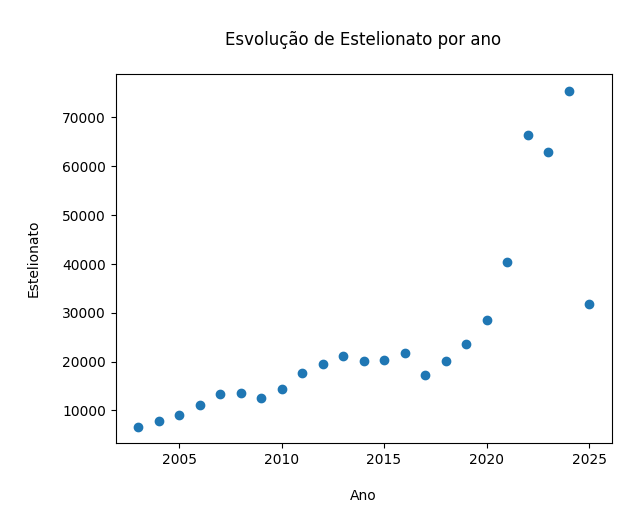

In [26]:
plt.scatter(estelionato_capital_ano['ano'], estelionato_capital_ano['estelionato'])
plt.xlabel('\nAno\n') 
plt.ylabel('\nEstelionato\n')
plt.title('\nEsvolução de Estelionato por ano\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

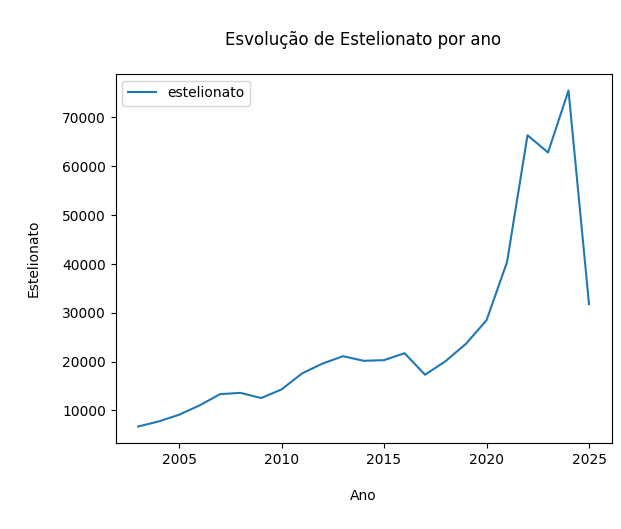

In [27]:
estelionato_capital_ano.plot(kind='line', x= 'ano', y= 'estelionato')
plt.xlabel('\nAno\n') 
plt.ylabel('\nEstelionato\n')
plt.title('\nEsvolução de Estelionato por ano\n')
plt.show

In [28]:
estelionato_delegacia = estelionato_capital.groupby(['cisp'])['estelionato'].sum().reset_index()
estelionato_delegacia = estelionato_delegacia.sort_values(by= 'estelionato', ascending= False)
estelionato_delegacia

,cisp,estelionato
12,16,39642
31,35,37030
28,32,31128
0,1,26991
30,34,22691
2,5,20928
8,12,20428
15,19,19818
6,10,18816
38,42,18396


In [29]:
array_estelionato = np.array(estelionato_delegacia['estelionato'])
array_estelionato



array([39642, 37030, 31128, 26991, 22691, 20928, 20428, 19818, 18816,
       18396, 17946, 17340, 17267, 16596, 15103, 15099, 14568, 14064,
       13263, 13048, 13009, 12435, 11250, 10297, 10000,  9863,  9670,
        8498,  8280,  7981,  7673,  7202,  7089,  6789,  6691,  6459,
        6335,  6194,  5695,  2071,  1246,    98])

In [30]:
q1 = np.percentile(array_estelionato, 25)
q2 = np.percentile(array_estelionato, 50)
q3 = np.percentile(array_estelionato, 75)
print(f'O primeiro quartil é até {q1}, o segundo até {q2} e o terceiro até {q3}')

O primeiro quartil é até 7319.75, o segundo até 12722.0 e o terceiro até 17794.5


In [31]:
#BARRA DA TIJUCA, CAMPO GRANDE, TAQUARA
quarto_quartil = estelionato_delegacia[estelionato_delegacia['estelionato'] >= q3]
quarto_quartil = quarto_quartil.sort_values(by= 'estelionato', ascending= False)
quarto_quartil


,cisp,estelionato
12,16,39642
31,35,37030
28,32,31128
0,1,26991
30,34,22691
2,5,20928
8,12,20428
15,19,19818
6,10,18816
38,42,18396


In [46]:
#Intervalo interquartil
iqr = q3 - q1
limite_superior = q3 + (1.5*iqr)
limite_inferior = q1 - (1.5*iqr)
print(f'O IQR é: {iqr}, Limite superior: {limite_superior}, limite inferior: {limite_inferior}')

O IQR é: 10474.75, Limite superior: 33506.625, limite inferior: -8392.375


In [47]:
pra_cima = estelionato_delegacia[estelionato_delegacia['estelionato'] >= limite_superior]
pra_cima

,cisp,estelionato
12,16,39642
31,35,37030


In [48]:
pra_baixo = estelionato_delegacia[estelionato_delegacia['estelionato'] <= limite_inferior]
pra_baixo

,cisp,estelionato


In [32]:
crimes_violentos = df_municip[['ano', 'regiao','fmun', 'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro' ]]
crimes_violentos


,ano,regiao,fmun,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
0,2014,Interior,Angra dos Reis,12,2,96,7
1,2014,Interior,Aperibé,0,0,0,0
2,2014,Interior,Araruama,2,6,69,7
3,2014,Interior,Areal,0,0,0,0
4,2014,Interior,Armação dos Búzios,2,0,44,6
...,...,...,...,...,...,...,...
12599,2025,Interior,Três Rios,5,6,35,2
12600,2025,Interior,Valença,4,4,32,0
12601,2025,Interior,Varre-Sai,0,0,4,1
12602,2025,Interior,Vassouras,0,2,19,2


In [33]:
regiao_dos_lagos = ['Araruama', 'Arraial do Cabo', 'ArmaÃ§Ã£o dos BÃºzios', 'Cabo Frio', 'Iguaba Grande', 'SÃ£o Pedro da Aldeia', 'Saquarema', 'Rio das Ostras', 'MaricÃ¡']

In [34]:
crimes_lagos = crimes_violentos.loc[(crimes_violentos['fmun'].isin(regiao_dos_lagos))]
crimes_lagos

,ano,regiao,fmun,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
2,2014,Interior,Araruama,2,6,69,7
5,2014,Interior,Arraial do Cabo,0,0,32,2
11,2014,Interior,Cabo Frio,9,12,119,9
27,2014,Interior,Iguaba Grande,0,1,23,1
66,2014,Interior,Rio das Ostras,4,11,76,0
...,...,...,...,...,...,...,...
12517,2025,Interior,Arraial do Cabo,0,0,14,1
12523,2025,Interior,Cabo Frio,6,4,59,6
12539,2025,Interior,Iguaba Grande,0,2,6,1
12578,2025,Interior,Rio das Ostras,3,3,43,7


In [35]:
crimes_lagos['total_crimes'] = crimes_lagos[['letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro']].sum(axis=1)
crimes_lagos

C:\Users\36134552025.2\AppData\Local\Temp\ipykernel_14196\1548302402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_lagos['total_crimes'] = crimes_lagos[['letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro']].sum(axis=1)


,ano,regiao,fmun,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,total_crimes
2,2014,Interior,Araruama,2,6,69,7,84
5,2014,Interior,Arraial do Cabo,0,0,32,2,34
11,2014,Interior,Cabo Frio,9,12,119,9,149
27,2014,Interior,Iguaba Grande,0,1,23,1,25
66,2014,Interior,Rio das Ostras,4,11,76,0,91
...,...,...,...,...,...,...,...,...
12517,2025,Interior,Arraial do Cabo,0,0,14,1,15
12523,2025,Interior,Cabo Frio,6,4,59,6,75
12539,2025,Interior,Iguaba Grande,0,2,6,1,9
12578,2025,Interior,Rio das Ostras,3,3,43,7,56


In [36]:
crimes_lagos_totais = crimes_lagos.groupby(['fmun'])['total_crimes'].sum().reset_index()
crimes_lagos_totais = crimes_lagos_totais.sort_values(by= 'total_crimes', ascending= False)
crimes_lagos_totais

,fmun,total_crimes
3,Cabo Frio,13399
6,Rio das Ostras,9537
0,Araruama,7825
7,Saquarema,6169
2,Arraial do Cabo,2502
4,Iguaba Grande,1809
5,MaricÃ¡,457
8,SÃ£o Pedro da Aldeia,136
1,ArmaÃ§Ã£o dos BÃºzios,97


In [37]:
array_violentos = np.array(crimes_lagos_totais['total_crimes'])
array_violentos



array([13399,  9537,  7825,  6169,  2502,  1809,   457,   136,    97])

In [38]:
q1_violentos = np.percentile(array_violentos, 25)
q2_violentos = np.percentile(array_violentos, 50)
q3_violentos = np.percentile(array_violentos, 75)
print(f'O primeiro quartil é até {q1_violentos}, o segundo até {q2_violentos} e o terceiro até {q3_violentos}')

O primeiro quartil é até 457.0, o segundo até 2502.0 e o terceiro até 7825.0


In [39]:
quarto_quartil = crimes_lagos_totais[crimes_lagos_totais['total_crimes'] <= q1_violentos]
quarto_quartil = quarto_quartil.sort_values(by= 'total_crimes', ascending= False)
quarto_quartil


,fmun,total_crimes
5,MaricÃ¡,457
8,SÃ£o Pedro da Aldeia,136
1,ArmaÃ§Ã£o dos BÃºzios,97


<function matplotlib.pyplot.show(close=None, block=None)>

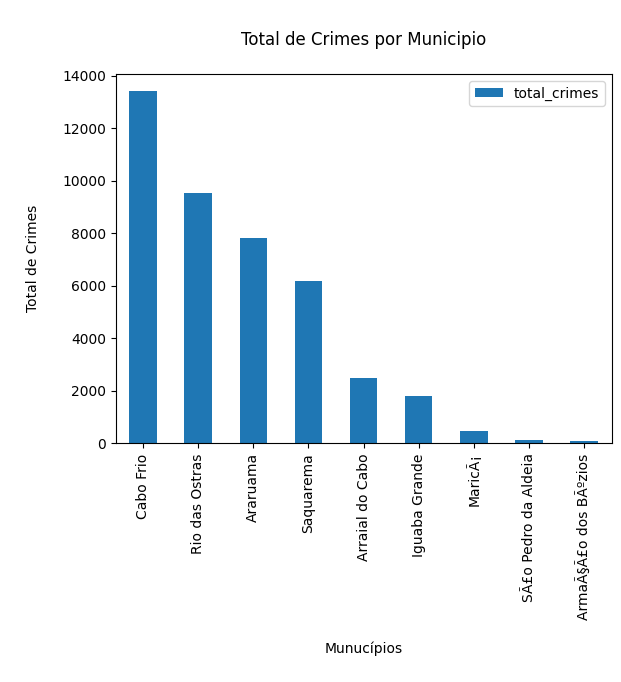

In [40]:
crimes_lagos_totais.plot(kind='bar', x= 'fmun', y= 'total_crimes')
plt.xlabel('\nMunucípios\n') 
plt.ylabel('\nTotal de Crimes\n')
plt.title('\nTotal de Crimes por Municipio\n')
plt.show

In [41]:
df_upp = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv',sep= ';', encoding= 'latin1')
df_upp

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,19
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,0,2,0,1,0,0,0,0,0,9
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,0,1,1,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,34,Arará / Mandela,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7976,35,Lins,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7977,36,Camarista Méier,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7978,37,Mangueirinha,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
upp_ocorrencia = df_upp.groupby(['upp'])['registro_ocorrencias'].sum().reset_index()
upp_ocorrencia = upp_ocorrencia.sort_values(by= 'registro_ocorrencias', ascending= False)
upp_ocorrencia

,upp,registro_ocorrencias
37,Vila Kennedy,27677
12,Cidade de Deus,23219
4,Barreira do Vasco / Tuiuti,14574
28,Rocinha,12788
18,Jacarezinho,12753
19,Lins,8297
21,Mangueira,7773
22,Mangueirinha,7264
8,Camarista Méier,6601
20,Macacos,6201


In [43]:
array_upp = np.array(upp_ocorrencia['registro_ocorrencias'])
array_upp


array([27677, 23219, 14574, 12788, 12753,  8297,  7773,  7264,  6601,
        6201,  6062,  5840,  5553,  5132,  5083,  5033,  4889,  4794,
        4628,  4483,  4212,  3681,  3629,  3539,  3503,  3148,  3102,
        2967,  2753,  2516,  2402,  2371,  2285,  1951,  1490,  1481,
        1270,   893])

In [44]:
q1_upp = np.percentile(array_upp, 25)
q2_upp = np.percentile(array_upp, 50)
q3_upp = np.percentile(array_upp, 75)
print(f'O primeiro quartil é até {q1_upp}, o segundo até {q2_upp} e o terceiro até {q3_upp}')

O primeiro quartil é até 2806.5, o segundo até 4555.5 e o terceiro até 6166.25


In [45]:
quarto_quartil = upp_ocorrencia[upp_ocorrencia['registro_ocorrencias'] >= q3_upp]
quarto_quartil = quarto_quartil.sort_values(by= 'registro_ocorrencias', ascending= False)
quarto_quartil


,upp,registro_ocorrencias
37,Vila Kennedy,27677
12,Cidade de Deus,23219
4,Barreira do Vasco / Tuiuti,14574
28,Rocinha,12788
18,Jacarezinho,12753
19,Lins,8297
21,Mangueira,7773
22,Mangueirinha,7264
8,Camarista Méier,6601
20,Macacos,6201
